In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("iris.data",header=None)
df.columns=['sl','sw','pl','pw','class']

In [3]:
#Here sr feature is the sepal ratio and pr is the petal ratio
df['sr'] = df['sl']/df['sw']
df['pr'] = df['pl']/df['pw']

<AxesSubplot:xlabel='sr', ylabel='pr'>

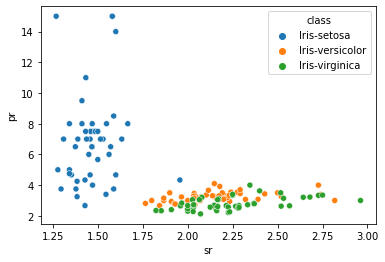

In [4]:
#Q.1. Clusters
import seaborn as sns
sns.scatterplot(x='sr', y='pr', data=df, hue='class')

Q.2 Following code is the kmeans++ implementation

In [5]:
# distance(p1,p2) calculates the squared euclidean distance between p1 and p2 of two features pr and sr
def distance(p1,p2):
    return (((p1['sr'] - p2['sr'])*(p1['sr'] - p2['sr'])) + ((p1['pr'] - p2['pr'])*(p1['pr'] - p2['pr'])))**2

In [6]:
import random
# centroid_initialization(k) function finds k centroids, where the first centroid is selected randomly from the
# data points and the following centroids are selected amongst points that is farthest away from the centroids.
def centroid_initialization(points, k):
    centroid = []
    centroid.append(random.randint(1,points.shape[0]))
    for i in range(k-1):
        tempdist = [100000]*points.shape[0]
        for j in centroid:
            for x in range(points.shape[0]):
                tempdist[x] = min(distance(points.iloc[j],points.iloc[x]), tempdist[x])
        centroid.append(tempdist.index(max(tempdist)))
    centroid_values = []
    for c in centroid:
        centroid_values.append({'sr':points.iloc[c].sr, 'pr':points.iloc[c].pr})
    return centroid_values

In [7]:
# train() function will take input as the initialized centroid values and will create clusters
def train(centroid_values):
    cnt = 50
    accuracy_v = []
    prev_centroid = centroid_values
    while (cnt):
        temp_ftype =  [-1]*df.shape[0]
        temp_distance = [1000000]*df.shape[0]
        for j in range(len(centroid_values)):
                for x in range(df.shape[0]):
                    if distance(centroid_values[j],df.iloc[x]) < temp_distance[x]:
                        temp_distance[x] = distance(centroid_values[j],df.iloc[x])
                        temp_ftype[x] = j

        for j in range(len(centroid_values)):
            indices = [i for i, x in enumerate(temp_ftype) if x == j]
            centroid_values[j]['sr'] = df.loc[indices].sr.mean()
            centroid_values[j]['pr'] = df.loc[indices].pr.mean()
        accuracy_v.append(sum(temp_distance))
        cnt-=1
    return sum(temp_distance), accuracy_v, centroid_values, temp_ftype

In [10]:
accuracy_sum = []
distances = []
centroid_list = []
ftype_list = []
for i in range(1,6):
    ci = centroid_initialization(df[['sr','pr']],i)
    tempd, acc, cen, ftype = (train(ci))
    distances.append(tempd)
    accuracy_sum.append(acc)
    centroid_list.append(cen)
    ftype_list.append(ftype)

Text(0, 0.5, 'Objective score')

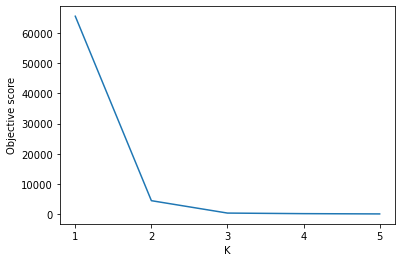

In [11]:
#Q.3 The following graph plots the objective score for the number of clusters.
plt.plot([str(i) for i in range(1,6)], distances, linestyle='-') 
plt.xlabel('K')
plt.ylabel('Objective score')

In [12]:
#Q.4. Following is the value of K, which gave minimum clustering objective.
lowest_score_cluster_index = distances.index(min(distances))
print(lowest_score_cluster_index + 1)

5


Text(0, 0.5, 'Objective accuracies')

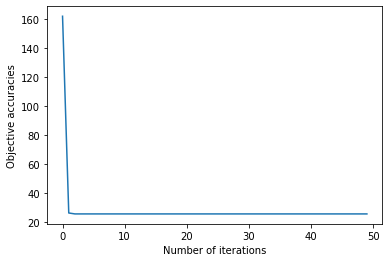

In [15]:
#Q.4.a. Following plot shows how the accuracy changes with the number of iterations for k=5
plt.plot([i for i in range(50)], accuracy_sum[lowest_score_cluster_index], linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Objective accuracies')

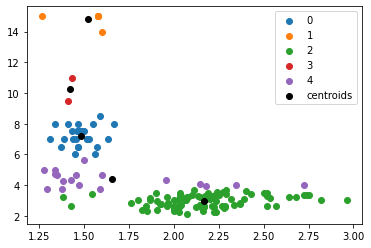

In [14]:
#Q.4.b. Following plot shows data colored by assignment, and the cluster centers
import numpy as np
labels = ftype_list[lowest_score_cluster_index]
centroids = centroid_list[lowest_score_cluster_index]
u_labels = np.unique(labels)
for i in u_labels:
    indices = []
    for j in range(df.shape[0]):
        if labels[j]==i:
            indices.append(j)
    plt.scatter(df['sr'].loc[indices] , df['pr'].loc[indices] , label = i)
plt.scatter([c['sr'] for c in centroids], [c['pr'] for c in centroids],
                color = 'black', label = 'centroids')
plt.legend()